# 一、高斯分布与混合高斯


## 1.高斯分布的局限

虽然高斯分布有很多非常好的分析特性，但是当其对真实数据集进行建模的时候就会有很大的局限性。

比如美国黄石公园的[old faithful](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat) 数据


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

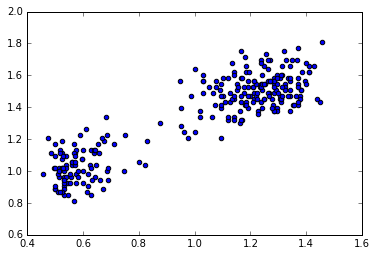

In [2]:
s=np.loadtxt('old_faithful.txt')[:,1:]

#我们所需的数据在第一列和第二列，将其分别进行归一化
d_1_max=np.max(s[:,0])
d_1_min=np.min(s[:,0])
d_2_max=np.max(s[:,1])
d_2_min=np.min(s[:,1])
plt.scatter(s[:,0]/(d_1_max-d_1_min),s[:,1]/(d_2_max-d_2_min))

从上图可以看出，数据明显分成了两块，所以使用高斯分布是很难对这一数据集进行建模的。但是如果用两个高斯分布的线性重叠，则可以更好地描述上述数据集的特征。


## 2.混合高斯模型

> 选择适当数目的高斯分布，调整分布的均值和协方差，以及这些高斯分布的线性组合的系数，我们就能够以任意精度来近似描述任一个连续分布

我们将K个高斯分布的重叠表达如下：

$$p(x)=\sum_{k=1}^K \pi_k N(x\vert \mu_k,\Sigma_k)$$

上式被称作混合高斯，每个高斯分布 $N(x\vert \mu_k,\Sigma_k)$ 被称作混合分量，并且有着各自的均值和协方差

- 参数约束：
  - $\pi_k$：混合系数（mixing coefficients）

   如果我们对上面高斯混合公式进行积分，因为p(x)和右侧的高斯分布都是归一化的，所以有：
   
   $$\sum_{k=1}^{K}\pi_k=1$$
   
   又由于要求$p(x)\geq 0$,并且$N(x\vert \mu_k,\Sigma_k) \geq 0$，所以每一个 $\pi_k \geq$。
   
   因此：
   
   $$\sum_{k=1}^{K}\pi_k=1\\
     0\leq\pi_k \leq 1
   $$

## 3.混合高斯分布的图解



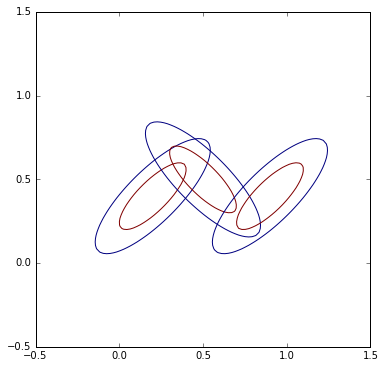

In [40]:
x=np.linspace(-0.5,1.5,100)
y=np.linspace(-0.5,1.5,100)

X, Y = np.meshgrid(x, y)
figure=plt.figure(figsize=(6,6))
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.axis('equal')

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
g1=multivariate_normal([0.2,0.4],[[1,0.8],[0.8,1]])
plt.contour(X, Y, g1.pdf(pos),[0.25,0.26])


g2=multivariate_normal([0.5,0.5],[[1,-0.8],[-0.8,1]])
plt.contour(X, Y, g2.pdf(pos),[0.25,0.26])

g3=multivariate_normal([0.9,0.4],[[1,0.8],[0.8,1]])
plt.contour(X, Y, g3.pdf(pos),[0.25,0.26])

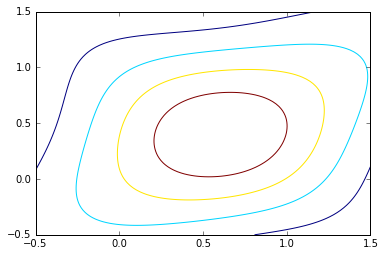

In [50]:
plt.contour(X,Y,0.3*g1.pdf(pos)+0.3*g2.pdf(pos)+0.4*g3.pdf(pos),5)

## 4.高斯混合的贝叶斯视角


如果我们将$\pi_k$视为第k个分量的先验概率，将密度$N(x\vert \mu_k,\Sigma_k)$视为x关于k的条件概率，那么原高斯分布可以看成是x与k的联合分布的边缘分布。

$$p(\mathbf{x})=\sum_{k=1}^{K}p(k)p(\mathbf{x} \vert k)$$

而在第九章中我们将知道后验概率$p(k \vert \mathbf{x})$起到了非常重要的作用，通常被称作responsibility。

$$\gamma_k(\mathbf{x})=p(k \vert \mathbf{x})\\
   =\frac{p(k)p(\mathbf{x} \vert k)}{\sum_l p(l)p(\mathbf{x} \vert l)}\\
   =\frac{\pi_k N(x\vert \mu_k,\Sigma_k)}{\sum_l \pi_l N(x\vert \mu_l,\Sigma_l)}
$$

## 5.高斯混合的总结

高斯混合分布的决定参数有$\mathbf{\pi} , \mathbf{\mu} ,\mathbf{\Sigma}$,其中：

$$
\mathbf{\pi}=\{\pi_1 ,\pi_2 ,...\pi_K\} \\
\mathbf{\mu} =\{\mu_1 ,\mu_2 ,...\mu_K \} \\
\mathbf{\Sigma} = \{\Sigma_1 ,...,\Sigma_K \}
$$

决定这些参数的一个方法最大似然，高斯混合分布的似然函数的对数为：

$$lnp (\mathbf{X} \vert \pi ,\mu ,\Sigma )=\sum_{n=1}^{N}ln \left(  \sum_{k=1}^{K} \pi_k N(x_n \vert \mu_k , \Sigma_k) \right)$$

其中 $\mathbf{X} = \{\mathbf{x}_1,... \mathbf{x}_N \}$



我们可以看出，由于对数中的k个求和的存在，高斯混合比单个高斯分布要复杂得多。

`而且这个式子的最大似然解法并没有闭式(closed-form)解`，一种能使的似然函数最大化的解法是数值迭代法（梯度下降等）。不过在第九章，我们将会学习一种非常强大的框架——EM(expectation maximization)。

